 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [153]:
# Reading whale returns

whale_path = Path("C:/Users/jakel_lv9e09w/Desktop/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/whale_returns.csv")

# Create a dataframe and make an index on the 'Date' column and to ensure we parse dates to be recognized in a proper date time format.
whale_data = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [154]:
# Count nulls
whale_data.isnull().sum()    # CODERS NOTE: With nulls, I want the TRUE/FALSE indicator and not the average nulls in the df.
                                          # Because if we're dropping all nulls it doesn't matter to me what % of nulls exist. They're all dropped.

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [155]:
# Drop nulls
whale_data.dropna(inplace=True)
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [156]:
#Display the clean dataframe in recent date. 
whale_data.sort_index(ascending=False).head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [157]:
# Calculate daily returns
whale_daily_returns = whale_data.pct_change().dropna()
whale_daily_returns.sort_index(ascending=True).head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [158]:
# Reading algorithmic returns and making dataframe the same as previous.
algo_path = Path("C:/Users/jakel_lv9e09w/Desktop/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/algo_returns.csv")

algo_data = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [159]:
# Count nulls
algo_data.isnull().sum()       # second colum algo 2 has 6 nulls. 

Algo 1    0
Algo 2    6
dtype: int64

In [160]:
# Drop nulls
algo_data.dropna(inplace=True)
algo_data.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [161]:
# Display our clean dataframe in the most recent dates.
algo_data.sort_index(ascending=False).head()

,Algo 1,Algo 2
Date,,
2019-05-01,0.000094,-0.007358
2019-04-30,-0.002944,-0.001570
2019-04-29,0.005208,0.002829
2019-04-26,0.002981,0.005256
2019-04-25,0.000682,-0.007247


In [162]:
# Calculating Daily Returns for Algo Portfilio
algo_daily_returns = algo_data.pct_change().dropna()
algo_daily_returns.sort_index(ascending=False).head()                               # sorted to display most current returns

,Algo 1,Algo 2
Date,,
2019-05-01,-1.031836,3.687689
2019-04-30,-1.565269,-1.554776
2019-04-29,0.746958,-0.461657
2019-04-26,3.368191,-1.725170
2019-04-25,-0.376856,-19.155605


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [163]:
# Reading S&P 500 Closing Prices
sp500_path = Path("C:/Users/jakel_lv9e09w/Desktop/uw-fintech-spring-21/Homework/04-Pandas/Instructions/Starter_Code/Resources/sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_data.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [164]:
# Drop nulls
sp500_data.dropna(inplace=True)
sp500_data.isnull().sum()

Close    0
dtype: int64

In [165]:
# Check Data Types
sp500_data.dtypes              # these return object datatypes. need these to be numeric. 

Close    object
dtype: object

In [166]:
# I don't like those $ signs in Close column let's get rid of them.
sp500_data['Close'] = sp500_data['Close'].str.replace('$', ' ')
sp500_data.head()

<ipython-input-166-06a78b535cb2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_data['Close'] = sp500_data['Close'].str.replace('$', ' ')


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [167]:
# Fix Data Types
sp500_data['Close'] = sp500_data['Close'].astype('float')
sp500_data.dtypes

Close    float64
dtype: object

In [168]:
# Rename `Close` Column to be specific to this portfolio.
# Rename to 'S&P Close'

# CODE FAILS for some reason. Very basic renaming throws type error. 
# sp500_data['Close'] = sp500_data['S&P Close']

# Rename Close column by renaming all columns using .rename() function. Passing dict of new names.
sp500_data = sp500_data.rename(columns={
    'Date': 'Date',
    'Close': 'S&P Close'

}
                                                )

# Verify the CLose is renamed.
sp500_data.columns

Index(['S&P Close'], dtype='object')

In [169]:
# Calculate Daily Returns
# Code does not calculate the percentage.
sp500_daily_returns = sp500_data.pct_change().dropna()
sp500_daily_returns.head()                                      

,S&P Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [170]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

# We have created 6 dataframes at this point: 3 read-in df's, and 3 pct_change df's 

# READ-IN DF'S: whale_data, algo_data, sp500_data
# PCT_CHANGE DF'S: whale_daily_returns, algo_daily_returns, sp500_daily_returns

# whale_daily_returns = whale_data.pct_change()
# algo_daily_returns = algo_data.pct_change()
# sp500_daily_returns = sp500_data.pct_change()

# Join all DAILY RETURNS df's into one mass daily returns dataframe across all portfolios. 

combined_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-0.001195
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,0.014378
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-0.003929
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,0.017254
2015-03-10,-18.625495,-2.263954,-3.067380,4.893672,-0.744524,-10.327163,0.001921


In [108]:
# CODERS NOTE: I also made a joined dataframe on the 3 original data csv files as well.

combined_data = pd.concat([whale_data, algo_data, sp500_data], axis='columns', join='inner')
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,2107.78
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,2098.53
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,2101.04
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,2071.26
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,2079.43


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Across All Portfolios'}, xlabel='Date'>

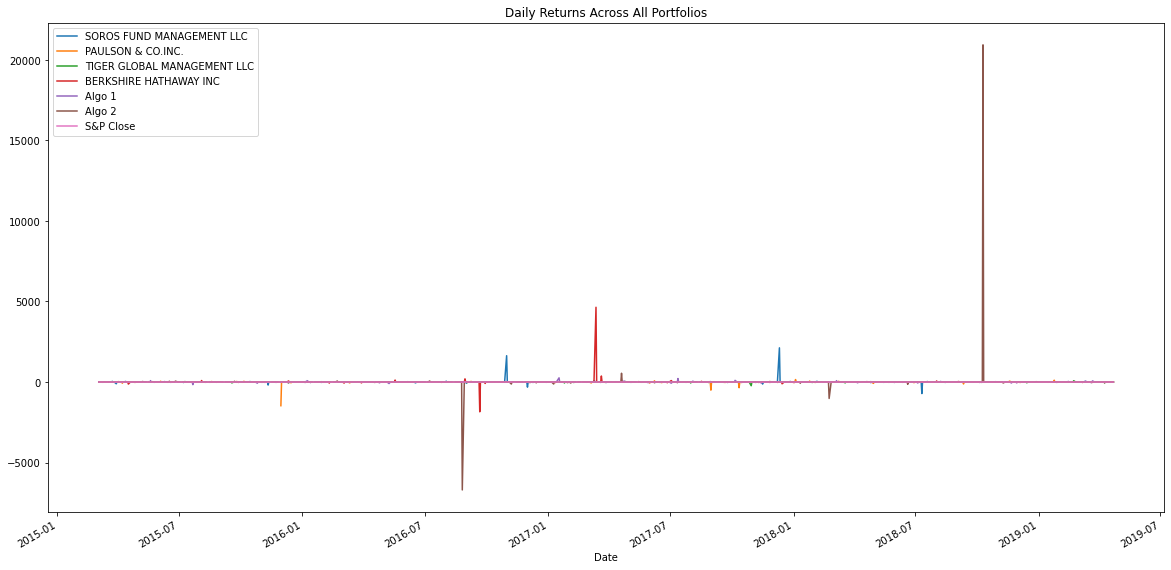

In [171]:
# CODERS NOTE: When I run the plot code, it displays a line-graph but then suddenly changes it to these vertical lines. 

# Plot daily returns of all portfolios

combined_returns.plot(title="Daily Returns Across All Portfolios", figsize=(20,10))

<AxesSubplot:xlabel='Date'>

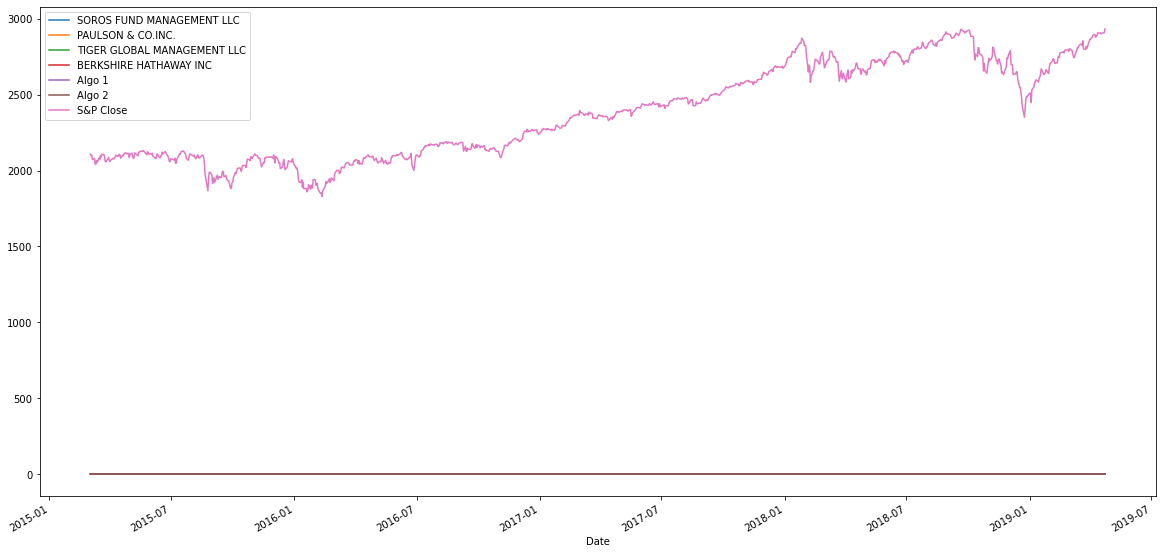

In [150]:
# OPTIONAL CODE: No need to run
# Plotting the combined data. Gives different result. This is what I saw first for a few seconds in previous code, before it changed to those vertical lines. 
combined_data.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

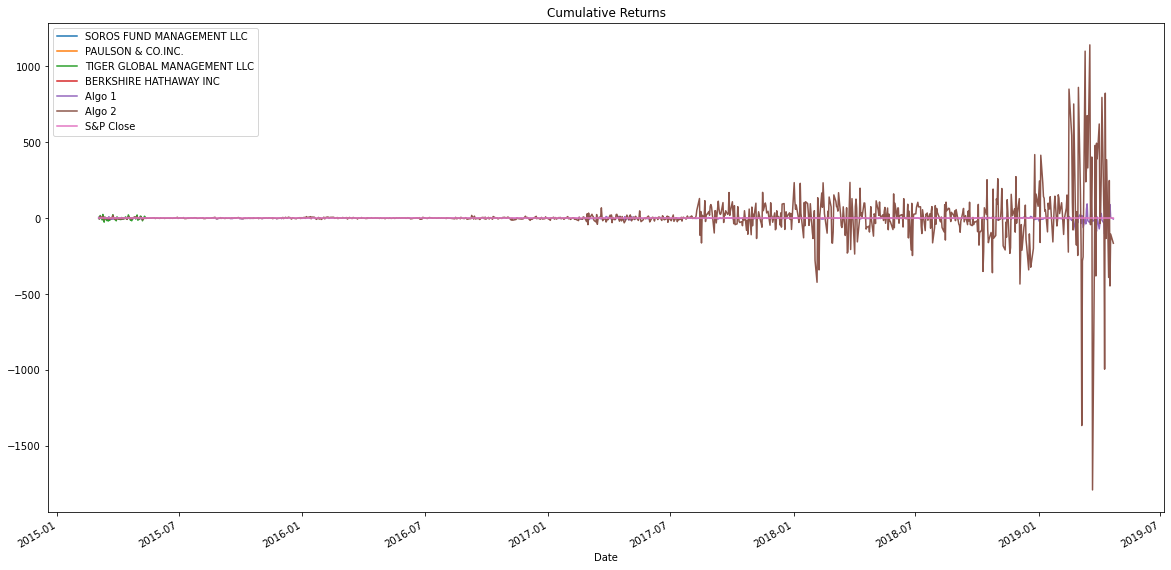

In [172]:
# Calculate cumulative daily returns of all portfolios

cumulative_returns =  (1 + combined_returns).cumprod()

# Plot cumulative returns

cumulative_returns.plot(title="Cumulative Returns", figsize=(20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

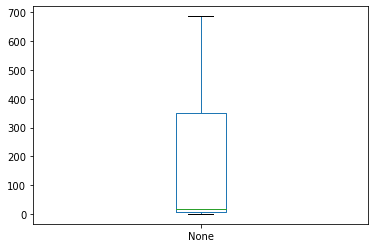

In [173]:
# Box plot to visually show risk
total_risk = combined_returns.std()     # taking the standard deviation of the joined dataframe that combined all portfolios. 
total_risk.plot.box()

<AxesSubplot:>

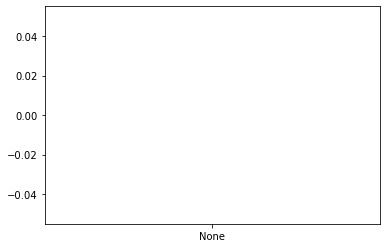

In [181]:
# Standard deviation of whale portfolio. 
# We are plotting based on the standard deviation of the daily returns of the whale data.
whale_risk = whale_daily_returns.std()
whale_risk.plot.box()

<AxesSubplot:>

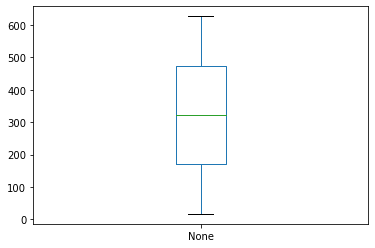

In [182]:
# box plot for Algorithims
# based on standard deviation of daily returns for algo data.
algo_risk = algo_daily_returns.std()
algo_risk.plot.box()

<AxesSubplot:>

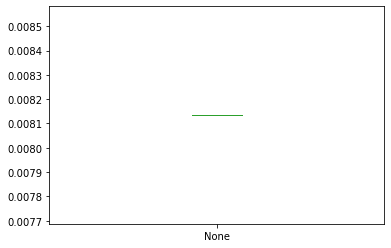

In [183]:
# Box plot for S&P500
sp500_risk = sp500_daily_returns.std()
sp500_risk.plot.box()

### Calculate Standard Deviations

In [3]:
# Calculate the daily standard deviations of all portfolios

# In order to get the std dev for all portfolios. We simply take the standard deviation of the joined daily returns.

#whale_daily_returns = whale_data.pct_change().dropna(inplace=True)
#algo_daily_returns = algo_data.pct_change().dropna(inplace=True)
#sp500_daily_returns = sp500_data.pct_change().dropna(inplace=True)
#combined_returns = pd.concat([whale_daily_returns, algo_daily_returns, sp500_daily_returns], axis='columns', join='inner')

combined_std = combined_returns.std().dropna()
combined_std

NameError: name 'combined_returns' is not defined

In [122]:
# Standard Deviation of Whale Daily Returns 
whale_std = whale_daily_returns.std().dropna()
whale_std                                                      # Does not return the standard deviation

AttributeError: 'NoneType' object has no attribute 'std'

In [124]:
# Standard Deviation of Algorithim Daily Rertuns
algo_std = algo_daily_returns.std().dropna()
algo_std                                                       # Does not return correct values for a standard deviaiton 

AttributeError: 'NoneType' object has no attribute 'std'

In [ ]:
# Standard Deviation for SP500 Daily Returns
sp500_std = sp500_daily_returns.std().dropna()
sp500_std

In [ ]:
# CODERS NOTE: Technically we didn't need to define new variables for std dev, since we did that in the box plot portion.
# We took the std deviation of the daily returns and plotted it. So we can simply call print statements on those box plots

print(total_risk)
print(whale_risk)
print(algo_risk)
print(sp500_risk)

### Determine which portfolios are riskier than the S&P 500

In [125]:
# Determine which portfolios are riskier than the S&P 500

# CODER'S NOTE: Cannot make a determination on risk comparison at this time. Jupyter-Labs environment is not returning correct results for the code. 

AttributeError: 'NoneType' object has no attribute 'std'

### Calculate the Annualized Standard Deviation

In [4]:
# Calculate the annualized standard deviation (252 trading days)
# We assigned combined_std = combined_returns.std() earlier.

annualized_std = combined_std * np.sqrt(252)
annualized_std

NameError: name 'combined_std' is not defined

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

In [ ]:
# Whale Investor standard deviation 
# I'm using the whale_data df 

whale_21 = whale_data.rolling(window=21).std
whale_21

In [ ]:
#Plot the whale rolling std deviation
whale_21.plot()

In [ ]:
# Algorithm rolling std over 21 days

algo_21 = algo_data.rolling(window=21).std
algo_21

In [ ]:
#Plot the algo std dev
algo_21.plot()

In [ ]:
# S&P500 rolling std over 21 days

sp500_21 = sp500_data.rolling(window=21).std
sp500_21

In [ ]:
# Plot the sp500
sp500_21.plot() 

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

correlation_of_returns = combined_returns.corr()

# Display de correlation matrix
# I will utilize a heatmap display of the correlation. 

sns.heatmap(correlation_of_returns) 

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio
# Covariance indicates the level to which two variables vary together.
# I'm going to assume we're using the np.cov() function

whale_covariance = np.cov(whale_daily_returns)

# Calculate variance of S&P 500

sp500_variance = sp500_daily_returns.var()

# Computing beta
#beta = covariance / variance
# CODERS NOTE: I'm going to assume we're testing the single portfolio covariance in this case whale against the variance of SP500?

whale_beta = whale_covariance / sp500_variance

# Plot beta trend

whale_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios

# Sharpe ratio = (average return rate combined investments - average risk free rate) / std deviation of the 

risk_free_rate = 0
a = combined_returns
b = risk_free_rate      #CODER'S NOTE: I am not sure what the risk-free rate is. The class example on sharpe ratio had a dataframe called rfrate.
                        # I am going to assume a risk-free rate of zero.

# Order of Operations: from left-to-right 
# 1st parentheses: subtract the mean of combined returns - mean of risk-free rate (which is zero) to result in the mean of combined returns
# 2nd parentheses: takes the std dev of combined returns and multiplies by square root of 252 (number of trading days)
# Multiply 252 by the numerator and then divide by denominator to represent the daily figures.

sharpe_ratios = ( 252 * (a.mean() - b.mean()) / (a.std() * np.sqrt(252)) )
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title-'Sharpe Ratios of Combined Returns', figsize=(15,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

At the moment I cannot make a determination based on the output my python environment is giving me. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [13]:
# Reading data from 1st stock

goog_path = Path("../jak_assignment_2/goog_historical.csv")
goog_data = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
goog_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [14]:
# Reading data from 2nd stock

aapl_path = Path("../jak_assignment_2/aapl_historical.csv")
aapl_data = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [15]:
# Reading data from 3rd stock
costco_path = Path("../jak_assignment_2/cost_historical.csv")
costco_data = pd.read_csv(costco_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
costco_data.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [16]:
# Cleaning Up and Dropping Nulls across the dataframes
goog_data.dropna(inplace=True)
aapl_data.dropna(inplace=True)
costco_data.dropna(inplace=True)

In [17]:
# Combine all stocks in a single DataFrame
combined_stocks = pd.concat([goog_data, aapl_data, costco_data], axis='columns', join='inner')
combined_stocks.head()

,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [23]:
# Reset Date index
# CODER'S NOTE: I interpret this as breaking down the Trade Date into 3 indexes for Year, Month, and Day
# UPDATE: I eliminated Day.
combined_stocks_reset = combined_stocks.groupby([combined_stocks.index.year, combined_stocks.index.month]).last()
combined_stocks_reset

Symbol     NOCP Symbol    NOCP Symbol    NOCP
Trade DATE Trade DATE                                              
2018       5            GOOG  1098.26   AAPL  188.59   COST  195.76
           6            GOOG  1119.50   AAPL  190.24   COST  197.13
           7            GOOG  1127.46   AAPL  187.18   COST  207.99
           8            GOOG  1220.01   AAPL  201.50   COST  217.13
           9            GOOG  1197.00   AAPL  228.36   COST  234.68
           10           GOOG  1195.31   AAPL  227.26   COST  234.65
           11           GOOG  1070.00   AAPL  222.22   COST  229.60
           12           GOOG  1106.43   AAPL  184.82   COST  232.08
2019       1            GOOG  1045.85   AAPL  157.92   COST  204.76
           2            GOOG  1110.75   AAPL  166.52   COST  210.27
           3            GOOG  1140.99   AAPL  174.97   COST  219.44
           4            GOOG  1194.43   AAPL  191.24   COST  244.19
           5            GOOG  1168.08   AAPL  210.52   COST  241.59

In [24]:
# After breaking down the date index into three parts, it has the same column name for YEAR, MONTH, DAY
combined_stocks_reset = combined_stocks_reset.rename(columns ={
    'Trade DATE': 'Year',
    'Trade DATE': 'Month'
}
                                                     
                                                    )     #CODER'S NOTE: This did not rename my Trade DATE columns. Out of ideas. 
combined_stocks_reset                                     # I assumed it would fill first Trade DATE with Year, and 2nd with Month

Symbol     NOCP Symbol    NOCP Symbol    NOCP
Trade DATE Trade DATE                                              
2018       5            GOOG  1098.26   AAPL  188.59   COST  195.76
           6            GOOG  1119.50   AAPL  190.24   COST  197.13
           7            GOOG  1127.46   AAPL  187.18   COST  207.99
           8            GOOG  1220.01   AAPL  201.50   COST  217.13
           9            GOOG  1197.00   AAPL  228.36   COST  234.68
           10           GOOG  1195.31   AAPL  227.26   COST  234.65
           11           GOOG  1070.00   AAPL  222.22   COST  229.60
           12           GOOG  1106.43   AAPL  184.82   COST  232.08
2019       1            GOOG  1045.85   AAPL  157.92   COST  204.76
           2            GOOG  1110.75   AAPL  166.52   COST  210.27
           3            GOOG  1140.99   AAPL  174.97   COST  219.44
           4            GOOG  1194.43   AAPL  191.24   COST  244.19
           5            GOOG  1168.08   AAPL  210.52   COST  241.59

In [25]:
# Reorganize portfolio data by having a column per symbol
combined_stocks = combined_stocks.pivot_table(values='GOOG', index='Trade DATE', columns='Symbol')
combined_stocks

KeyError: 'GOOG'

In [ ]:
# Calculate daily returns
combined_daily_stock_returns = combined_stocks.pct_change()
# Drop NAs
combined_stock_returns.dropna(inplace=True)
# Display sample data
combined_stock_returns.sample(100)                        # show a random sample of 100 trades. 

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!

In [ ]:
#I cannot complete this custom portfolio section. I'm really hoping this last section is some kind of challenge.
# I spent most of my time on this homework trying to debug the data frame from erroring so much. 
# I understand the fundamentals of the dataframes just not the heavy statistics at this time. 
# I can confident read in csv's, manipulate and clean the data, join the data, calcuuate the pct changes and standard deviations. 